*Stanislav Borysov [stabo@dtu.dk], DTU Management*
# Advanced Business Analytics

## Web Data Mining - Part 1: Social media

A lot of valuable data can be collected from online sources. It can be used to get insights, make predictions, etc. In this notebook, we're going to practice data collection from online sources using API. Particularly, we will collect social media data from Twitter and weather data from Weatherbit.

### 1. Getting Twitter data
*Based on https://www.toptal.com/python/twitter-data-mining-using-python*

**! WARNING !**

**In order to make a developer account, you will need to use your email and phone number. The account can be deleted after class. However, if you do not want to use your personal data, you can go through Section 1 in the solutions notebook (Part 1 - Twitter-solutions.ipynb). After that, you can proceed with Section 2 "Twitter data analysis".**

#### 1.1. Creating developer account

In order to use Twitter’s API, we have to create a developer account on the Twitter website.

1. Sign in or create a Twitter account and apply for a developer account at https://developer.twitter.com/.
    1. Choose Academic / Student
    2. You need to add and verify your phone number  
    3. Fill in the following answers:
        1. "How will you use the Twitter API or Twitter data?": "In English, please describe how you plan to use Twitter data and/or APIs. For students and teachers, please include the name of the school, the name of the instructor and the course number (if available). The more detailed the response, the easier it is to review and approve."
        
        > I am a student at the Technical University of Denmark. I would like to learn more about web data mining and data science. Currently, I am attending a Data Science course. I will use the data for educational purposes only in the class. The analysis involves very basic natural language processing. The collected data will not be published anywhere or displayed to anyone. No commercial use or product development is expected.
        
        2. **"The specifics": switch to "No" everywhere.**
    4. Accept terms and conditions
    5. Confirm your email if asked
2. Create a new app
     1. App name (required): Any name that not already taken (e.g., *testappxxx12345*)
     2. Application description (required): *This is a test app.*
     3. Website URL (required): (any fake website) *https://example.com*
     4. Tell us how this app will be used (required): *This app will be used for education purposes only. No commercial use is expected. More characters to hit the 100-characters limit.*
3. Once your project has been created, click on the “Keys and Access Tokens” tab. You should now be able to see your consumer secret and consumer key.
     1. Copy your API key and API secret key to the cell below.
     2. Generate Access token and Access token secret and copy them to the cell below.

#### 1.2. Install tweepy
Tweepy is a python library to make access to the Twitter data easier. You can install tweepy using several options:
- Anaconda-Navigator: add chanel ```conda-forge```, press "update index...", search for ```tweepy```, install
- pip: pip install tweepy

**For other languages, check https://developer.twitter.com/en/docs/developer-utilities/twitter-libraries.html**

#### 1.3. Authenticating
Now that we have the necessary tools ready, we can start coding! The baseline of each application we’ll build today requires using Tweepy to create an API object which we can call functions with. In order to create the API object, however, we must first authenticate ourselves with our developer information.

First, let’s import Tweepy and add our own authentication information.

In [1]:
import tweepy

# replace these values with yours
api_key = "xxxxxxxxxxxxxxxxxxxxxxxxx"
api_secret_key = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
access_token = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
access_token_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

Now it’s time to create our API object.

In [2]:
# Creating the authentication object
auth = tweepy.OAuthHandler(api_key, api_secret_key)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

#### 1.4. Example 1: Your Timeline
In the first example, we’ll be pulling the ten most recent tweets from your Twitter feed. We’ll do this by using the API object’s ```home_timeline()``` function. We can then store the result in a variable, and loop through it to print the results.

Hints:
- use ```public_tweets = api.home_timeline()```
- and then iterate through the pulled tweets
```
for tweet in public_tweets:
    ...
    do something with the tweet (for example, print its text)
```
- you can access the text of the tweet using ```tweet.text```

WARNING! You won't get any results if you don't follow anyone. 

In [3]:
# Using the API object to get tweets from your timeline, 
# and storing it in a variable called public_tweets
public_tweets = api.home_timeline()
# foreach through all tweets pulled
for tweet in public_tweets:
    # printing the text stored inside the tweet object
    print(tweet.text)
    print(80 * '-')

В цей день 1990 року народився Володимир Гнатуша — солдат ЗСУ 79 оамбр. Загинув 11.07.2014 біля с.Зеленопілля під ч… https://t.co/duPpsNBBJ6
--------------------------------------------------------------------------------
Today's Tokyo🗼 https://t.co/wlDaAiOYzw
--------------------------------------------------------------------------------
https://t.co/Ze7xleFqIQ
--------------------------------------------------------------------------------
Hamburg https://t.co/mkBrsbLYSF
--------------------------------------------------------------------------------
В цей день 1988 року народився Олег Шевченко - солдат ЗСУ 25 омпб 54 омбр. Загинув 23.12.2017 від кулі снайпера під… https://t.co/nGrpWUmE7X
--------------------------------------------------------------------------------
Understanding Renaud Laplanche’s next Upgraded act https://t.co/ig7hW7EdoU https://t.co/dAXOvdhODQ
--------------------------------------------------------------------------------
Enjoy the complete history of emoji, f

The result should look like a bunch of random tweets, followed by the URL to the tweet itself. Following the link to the tweet will often bring you to the tweet itself.

#### 1.5. Example 2: Tweets from a Specific User

In this example, we’ll simply pull the latest twenty tweets from a user of our choice.

First, we’ll examine the Tweepy documentation at http://docs.tweepy.org/en/v3.5.0/api.html to see if a function like that exists. With a bit of research, we find that the ```user_timeline()``` function is what we’re looking for http://docs.tweepy.org/en/v3.5.0/api.html#API.user_timeline.

We can see that the ```user_timeline()``` function has some useful parameters we can use, specifically id (the ID of the user) and count (the number of tweets we want to pull). Note that we can only pull a limited number of tweets per query due to the Twitter’s rate limits (15 calls every 15 minutes). See https://developer.twitter.com/en/docs/basics/rate-limiting and https://developer.twitter.com/en/docs/basics/rate-limits for further details.

Let’s try to pull the latest twenty tweets from the twitter account ```NyTimes```.

Hints: 
- use ```tweets = api.user_timeline(id=userName, count=tweetCount)``` and print text of the tweets using the ``for`` loop like in the previous example
- the user name is "nytimes"

In [4]:
# The Twitter user who we want to get tweets from
name = "nytimes"
# Number of tweets to pull
tweetCount = 20

# Calling the user_timeline function with our parameters
tweets = api.user_timeline(id=name, count=tweetCount)

# foreach through all tweets pulled
for tweet in tweets:
    # printing the text stored inside the tweet object
    print(tweet.text)
    print(80 * '-')

President Trump's upending of foreign policy has Europeans asking hard questions about the U.S.'s global role, and… https://t.co/891ITS2l1m
--------------------------------------------------------------------------------
David Boies was one of America’s most admired lawyers. Then he represented Harvey Weinstein and Theranos. Which for… https://t.co/arrNJNY58V
--------------------------------------------------------------------------------
6 times as many people in Nigeria died from clashes between herders and farmers in the first half of this year as f… https://t.co/kRcRYECa5M
--------------------------------------------------------------------------------
RT @NYTmag: The deafening roar of Iceland's Dettifoss waterfall. 
The crunch of lava flowing from the erupting Kilauea volcano in Hawaii.
T…
--------------------------------------------------------------------------------
Pope Francis will recognize 7 bishops appointed by the Chinese government, ending a decades-old power struggle be

Some of the tweets are cut, probably, due to the old limit of 140 symbols (which is currently 280). To get full text of the tweets, you need to use the following command ```tweets = api.user_timeline(id=userName, count=tweetCount, tweet_mode='extended')```. 

WARNING! ```tweet.text``` is not available anymore and one needs to use ```tweet.full_text``` instead. It seems that this is not documented in the Tweepy documentation, so we'd have to figure it out ourselves by searching on the Internet.

In [5]:
# Calling the user_timeline function with our parameters
tweets = api.user_timeline(id=name, count=tweetCount, tweet_mode='extended')

# foreach through all tweets pulled
for tweet in tweets:
    # printing the text stored inside the tweet object
    print(tweet.full_text)
    print(80 * '-')

President Trump's upending of foreign policy has Europeans asking hard questions about the U.S.'s global role, and what Europe can or should do for its self-defense. https://t.co/xVEJTWDU4A
--------------------------------------------------------------------------------
David Boies was one of America’s most admired lawyers. Then he represented Harvey Weinstein and Theranos. Which forced him to defend … himself. https://t.co/21WbB3Gzxc
--------------------------------------------------------------------------------
6 times as many people in Nigeria died from clashes between herders and farmers in the first half of this year as from the war with Boko Haram. Local leaders are trying mediation as a way to reduce conflict. https://t.co/BOMb8Vq9bs
--------------------------------------------------------------------------------
RT @NYTmag: The deafening roar of Iceland's Dettifoss waterfall. 
The crunch of lava flowing from the erupting Kilauea volcano in Hawaii.
T…
--------------------------

Popular applications of this type of data can include:

- Running analysis on specific users, and how they interact with the world
- Finding Twitter influencers and analyzing their follower trends and interactions
- Monitoring the changes in the followers of a user

#### 1.6. Example 3: Finding Tweets Using a Keyword

Let’s do one last example: Getting the most recent tweets that contain a keyword. This can be extremely useful if you want to monitor specifically mentioned topics in the Twitter world, or even to see how your business is getting mentioned. Let’s say we want to see how Twitter’s been mentioning Tesla.

After looking through the Tweepy documentation, the ```search()``` function seems to be the best tool to accomplish our goal http://docs.tweepy.org/en/v3.5.0/api.html#API.search.

The most important parameter here is ```q``` - the query parameter, which is the keyword we’re searching for. We can also set the language parameter so we don’t get any tweets from an unwanted language. Let’s only return English (“en”) tweets.

We can now modify our code to reflect the changes we want to make. We first create variables to store our parameters (query and language), and then call the function via the API object. Let’s also print the screen name of the user that created the tweet in our loop.

Hints: 
- use ```tweets = api.search(q=query, lang=language, tweet_mode='extended')``` to get the tweets
- the query word is "tesla" and laguage is "en"
- to access the name of a user, use ```tweet.user.screen_name```

In [18]:
# The search term you want to find
query = "tesla"
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
tweets = api.search(q=query, lang=language, tweet_mode='extended')

# foreach through all tweets pulled
for tweet in tweets:
    # printing the text stored inside the tweet object
    print(tweet.user.screen_name, "tweeted:", tweet.full_text)
    print(80 * '-')

RyanCaveman tweeted: @lizzie363 @reicurran @RickAnderson That research was flawed and debunked by Popular Mechanics: https://t.co/YcHd9Oegdg
--------------------------------------------------------------------------------
timremedy tweeted: RT @chrisccollins: Here's a @Tesla spec ad I cut for fun. @elonmusk @TeslaMotorsClub @SpaceX #tesla #specad #elonmusk #spacex https://t.co/…
--------------------------------------------------------------------------------
queenrende tweeted: I am from Delaware and therefore one of the least aggressive drivers in the tri-state area, but let me tell you I have never come closer to giving someone the finger than that dude today making rude gestures to me in a Tesla with the vanity plate: PROFESLA
--------------------------------------------------------------------------------
Shad_DaGod tweeted: She say GOD leave it all 🔛 #TESLA #CITYOFGOD ‼️🌃 @ City of God https://t.co/RlPLjk0JRg
------------------------------------------------------------------------

Here are some practical ways you can use this information:

- Create a spatial graph on where your company is mentioned the most around the world
- Run sentiment analysis on tweets to see if the overall opinion of your company is positive or negative
- Create social graphs of the most popular users that tweet about your company or product
- Estimate popularity of an event (e.g. sports game, music concert) to analyze its impact on a public transport system

#### 1.7. The JSON behind the results

In the examples above, we printed the text from each tweet using ```tweet.text``` or ```tweet.full_text```. To refer to specific attributes of each tweet object, we have to look at the JSON returned by the Twitter API.

The result you receive from the Twitter API is in a JSON format and has quite an amount of information attached. For simplicity, this lecture mainly focuses on the ```full_text``` attribute of each tweet and information about the tweeter (the user that created the tweet). For the above sample, you can see the entire returned JSON object here: https://developer.twitter.com/en/docs/api-reference-index.

Here’s a quick look at some attributes a tweet has to offer. To access the JSON behind each tweet, we can use ```tweet._json```. To print this dictionary, another function called ```pprint``` can be helpful:
>```
from pprint import pprint
pprint(tweet._json)
```

Print JSON of the first tweet using this function.

In [19]:
from pprint import pprint
tweet = tweets[0]
pprint(tweet._json)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Sep 22 16:55:00 +0000 2018',
 'display_text_range': [36, 119],
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'popularmechanics.com/cars/hybrid-el…',
                        'expanded_url': 'https://www.popularmechanics.com/cars/hybrid-electric/news/a27039/tesla-battery-emissions-study-fake-news/',
                        'indices': [96, 119],
                        'url': 'https://t.co/YcHd9Oegdg'}],
              'user_mentions': [{'id': 128174162,
                                 'id_str': '128174162',
                                 'indices': [0, 10],
                                 'name': 'Lizzy',
                                 'screen_name': 'lizzie363'},
                                {'id': 4192414240,
                                 'id_str': '4192414240',
                                 'indices': [11, 21],
                                 'name': 'Rac

Each tweet contains a lot of data! Read the Twitter docs if you want to understand it better.

The JSON is represented by a dictionary in Python. For example, if you wanted to find the date the tweet was created, you would query it with ```tweet._json['created_at']```

In [20]:
print(tweet._json['created_at'])

Sat Sep 22 16:55:00 +0000 2018


#### 1.8. Saving data into a JSON file

Let's save the retrieved tweets to a JSON file for further analysis. 

**Rule of thumb: It's better to save more (redundant at the first glance) data rather than collect the missing data later.**

To work with the JSON data, we will use the ```json``` package. First, ```import json```

In [21]:
import json   

Now, we are ready to save the data. We want the following format: each line in the file should be a JSON string. 

Hints:
- to write one line to a file, one can use 
```
outfile = open(file_name, 'w')
outfile.write(string_to_write + '\n') 
# remember to include the end of line character
outfile.close()
```
- use a loop after ```open``` (and before ```close```) to write multiple lines
- to convert a json dictionary into a string, use ```json.dumps(tweet._json)```

In [22]:
outfile = open('tesla_tweets.txt', 'w')
for tweet in tweets:
    outfile.write(json.dumps(tweet._json) + '\n')
outfile.close()

Now check the number of lines in the file to make sure that it contains the correct number of tweets.

Hint: Open the file, read the lines and find their number

In [23]:
infile = open('tesla_tweets.txt')
lines = infile.readlines()
print(len(lines))
infile.close()

15


To collect the data to be used in this class, the following script was used. The script is given for the reference. Please do not run it as you might exceed the Twitter limits.

### 2. Twitter data analysis
*Based on https://www.coursera.org/specializations/jhu-data-science*

#### 2.1. Load the data

Load the JSON data from 'tesla_tweets_1000.txt' into a list of JSON dictionaries and print the number of tweets and the first tweet. 

Hints: 
- the file has the following structure, where each line contains a string representation of a JSON dictionary, which you need to parse:

> {...}\n

> {...}\n

> {...}\n

> ...

- use ```json.loads(string)``` to parse the string into a json dictionary
- use ```pprint``` instead of ```print``` to get 'pretty' formatting

In [34]:
tweets = []
infile = open('tesla_tweets_1000.txt')
for line in infile.readlines():
    tweets.append(json.loads(line))
infile.close()
print(len(tweets))
pprint(tweets[0])

1000
{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Sep 23 06:55:47 +0000 2018',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 759251,
                                 'id_str': '759251',
                                 'indices': [3, 7],
                                 'name': 'CNN',
                                 'screen_name': 'CNN'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'RT @CNN: A garage in California is outfitting vintage cars with '
              'state-of-the-art tech, swapping old electronics with Tesla '
              'batteries and el…',
 'geo': None,
 'id': 1043755791574949888,
 'id_str': '1043755791574949888',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'meta

Now print creation time, username and text for the first 10 tweets. To print each tweet, it's convenient to define a new function.

In [35]:
def print_tweet(tweet):
    print(tweet['created_at'], tweet['user']['name'], tweet['full_text'])
    print(80 * '-')

In [36]:
n_tweets_to_print = 10
for tweet in tweets[:n_tweets_to_print]:
    print_tweet(tweet)

Sun Sep 23 06:55:47 +0000 2018 Joshua Herold RT @CNN: A garage in California is outfitting vintage cars with state-of-the-art tech, swapping old electronics with Tesla batteries and el…
--------------------------------------------------------------------------------
Sun Sep 23 06:55:31 +0000 2018 🇮🇳 Nation 1st 🕉🚩 RT @Tweeter_wapsi: If I can make a car, can I make a Tesla as well?

To make it simple for DUMBTARDS:

Dassault said they are fine if Govt…
--------------------------------------------------------------------------------
Sun Sep 23 06:55:30 +0000 2018 TSLA_opinion Tesla family welcoming new family members. So much love... 😃😘 #Tesla $Tsla @elonmusk https://t.co/5LQMqqy5nT
--------------------------------------------------------------------------------
Sun Sep 23 06:55:25 +0000 2018 hännåh My Lyft driver pulled up in a mf TESLA and I was like “oooOooOoo you fancy” and he laughed for like 5 minutes 😂
--------------------------------------------------------------------------------

#### 2.2. Derive the sentiment of each tweet

In this task, you'll compute the sentiment of each tweet based on the sentiment scores of the terms in the tweet. For the simplicity, we assume that the sentiment of a tweet is equivalent to the sum of the sentiment scores for each term in the tweet.

The file AFINN-111.txt contains a list of pre-computed sentiment scores. Each line in the file contains a word or phrase followed by a sentiment score. For example,
>catastrophic	-4

>breathtaking	5

Each word or phrase that is found in a tweet but not found in AFINN-111.txt should be given a sentiment score of 0. See the file AFINN-README.txt for more information.

To use the data in the AFINN-111.txt file, you may find it useful to build a dictionary. The dictionary should have the following format: ```sent_dictionary={'term': score}```. Note that the AFINN-111.txt file format is tab-delimited, meaning that the term and the score are separated by a tab character. A tab character can be identified a "\t".

In [37]:
def build_sent_dictionary(sent_filename):
    # initialize an empty dictionary
    sent_dictionary = {} 
    afinnfile = open(sent_filename)
    for line in afinnfile:
        # The file is tab-delimited. "\t" means "tab character"
        term, score  = line.split("\t")  
        # Convert the score to an integer.
        sent_dictionary[term] = int(score)
    afinnfile.close()  
    # Print every (term, score) pair in the dictionary
    #print sent_dictionary.items() 
    return sent_dictionary

Now, let's write a function to rate sentiments of the tweets. To parse the text of each tweet and get a list of words, the following code might be useful:

```
import string
words = [word.strip(string.punctuation) for word in text.split()]
```

Here, ```word.strip(string.punctuation)``` is used to remove punctuation from each word.

In [38]:
import string

def rate_sentiments(tweets, sent_dictionary):
    scores = []
    for tweet in tweets:
        score = 0
        words = [word.strip(string.punctuation) for word in tweet['full_text'].split()]
        for word in words:
            if word in sent_dictionary: 
                score += sent_dictionary[word]
        scores.append(score)
    return scores

Now, use the functions to build the dictionary and get a list of scores for each tweet. 

In [39]:
sent_dictionary = build_sent_dictionary('AFINN-111.txt')
scores = rate_sentiments(tweets, sent_dictionary)

Let's take a closer look at the scores. First, we can plot a histogram.

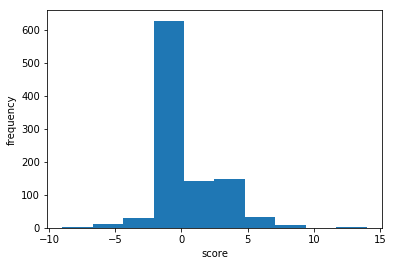

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline   

n, bins, patches=plt.hist(scores, bins=10)
plt.ylabel("frequency")
plt.xlabel("score")
plt.show()

What insights can be got from it? Let's also calculate and print a mean score of all tweets.

In [41]:
import numpy as np
print(np.mean(scores))

0.651


It's slightly positive! The time series of mean scores can be used, for example, to predict the stock price of a company. Can you come up with the other possible applications of the sentiment scores?

Let's check now the top 10 positive and 10 negative tweets.

Hint: To get indices of the tweets when sorting the list of scores, you might want to add these indices into the list via ```scores_ind = enumerate(scores)``` and sort the list on the second value of each element.

In [43]:
scores_ind = enumerate(scores)
scores_ind = sorted(scores_ind, key=lambda x: x[1])

n_tweets = 10
for i in range(n_tweets):
    print_tweet(tweets[scores_ind[len(tweets) - i - 1][0]])
print(80 * '-')
for i in range(n_tweets):
    print_tweet(tweets[scores_ind[i][0]])

Sun Sep 23 06:43:25 +0000 2018 Patrick Frickel @HaydenGerson @GuyTesla @elonmusk @Tesla @ElonBachman @ElonsPromises @TeslaCharts @markbspiegel When life is great take advantage. Spoil yourself and get your mind off people like Musk and the rest of his enthusiastic volunteers. They seem to be having fun. You deserve some too.
--------------------------------------------------------------------------------
Sun Sep 23 05:02:13 +0000 2018 James Locke This hotel is great, the maintenance gentleman was watching spot for me after I called. We had a good chat. He is impressed with Tesla and says the charger has been working great since installed a couple years ago. Happy to hear Tesla growing &amp; said they should get more chargers
--------------------------------------------------------------------------------
Sun Sep 23 05:10:06 +0000 2018 San RT @GuyTesla: I delivered a #Model3 today, helping out @elonmusk and the @Tesla team. So fun to watch new owners delight in everything the…
---------

Do they make any sense?

Automatic sentiment detection is one of the hardest problems in natural language processing (NLP). It's not as simple as a sum of sentiments of separate words since one word can completely change the meaning of a sentence. Also, you can think of such things as subjectivity, tone, context, irony, sarcasm, and many others!

#### 2.3. Compute Term Frequency

Computing word frequency is one of the basic routine tasks in NLP. The frequency can be used to do document classification, retrieval, topic modeling. Let's compute frequency of each word in all tweets as ``freq=number_of_word_occurrences/total_number_of_words``.

In [44]:
def word_frequency(tweets):
    word_freq = {}
    word_count = 0
    for tweet in tweets:
        words = [word.strip(string.punctuation) for word in tweet['full_text'].split()]
        #print words
        for word in words:
            if word not in word_freq: 
                word_freq[word] = 0
            word_freq[word] += 1
            word_count += 1
    for word in word_freq:
        word_freq[word] /= word_count
    return word_freq

word_freq = word_frequency(tweets)

Now, plot the frequencies of the top 30 most frequent words. 

Hints: 
- dictionaries in python have no order, so it doesn't make sense to sort them. Convert the frequency dictionary into a list of tuples first: ```[(word, frequency)]```
- to show labels on the x-axis of the plot vertically, you can use ```plt.xticks(rotation=90)```

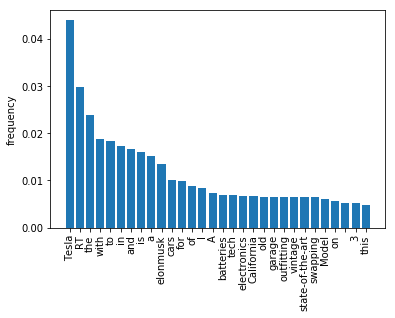

In [45]:
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
#print(word_freq_sorted)
n_plot = 30
y = [x[1] for x in word_freq_sorted[:n_plot]]
l = [x[0] for x in word_freq_sorted[:n_plot]]
plt.bar(l, y)
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

As you can see, such non-informative words as "the", "of" or "a" are among the most frequent ones. Removing these words, called "stop words", is one of the first steps in text preprocessing in NLP.

#### 2.4. Top hashtags

Let's us compute the most popular hashtags in a similar manner as word frequency. Print the top 10 hashtags and their counts.

In [48]:
def top_hashtags(tweets):
    hashtags = {}
    for tweet in tweets:
        tweet_hashtags = tweet['entities']['hashtags']
        for hashtag in tweet_hashtags:
            if hashtag['text'] not in hashtags:
                hashtags[hashtag['text']] = 0
            hashtags[hashtag['text']] += 1
    return hashtags

hashtags = top_hashtags(tweets)
hashtags_sorted = sorted(hashtags.items(), key=lambda x: x[1], reverse=True)
pprint(hashtags_sorted[:10])

[('Tesla', 59),
 ('tesla', 49),
 ('specad', 40),
 ('elonmusk', 40),
 ('spacex', 40),
 ('Model3', 17),
 ('IOTA', 12),
 ('model3', 9),
 ('CleanTechnica', 8),
 ('ElectricVehicle', 7)]


#### 2.5. User location

Let's try to figure out where our tweets come from. There are several options to do it:

1. The most precise information is contained in ```tweet['coordinates']```. However, as you'll see, it's rare when users report geolocation directly in their tweets.
2. Another option is to use ```tweet['place']```.
3. Finally, you can try to use the location of the user: ```tweet['user']['location']```. However, this information can be potentially misleading.

To check the availability of these data fields, we need to calculate the number of tweets where these attributes are non-empty.

In [50]:
tweets_place, tweets_coord, tweets_user_location = 0, 0, 0
for tweet in tweets:
    if tweet['coordinates']:
        tweets_coord += 1
    if tweet['place']:
        tweets_place += 1
    if tweet['user']['location']:
        tweets_user_location += 1
print("tweets_place", tweets_place)
print("tweets_coord", tweets_coord)
print("tweets_user_location", tweets_user_location)
print("tweets_total", len(tweets))

tweets_place 15
tweets_coord 0
tweets_user_location 700
tweets_total 1000


Wow, it doesn't look promising :( 

Detecting location of the tweets is not so straightforward as ```tweet['coordinates']``` and ```tweet['place']``` are missing for the almost all tweets. Thus, we need to rely on the user location.

Data science requires creativity. Can you think of the other approaches to get the place of a tweet? Discuss it with the other students or teacher. 

As the most tweets come from the U.S.A. (you can check if you want), we can try to identify the state where a tweet comes from. We can get this information from the two attributes: 
1. ```tweet['place']```
2. If the first is not available, then ```tweet['user']['location']```

But let's first inspect the possible values of the two fields to find the best strategy to extract the state. Print these attributes for all tweets.

In [51]:
for tweet in tweets:
    if tweet['place']:
        print("place:", tweet['place'])
    elif tweet['user']['location']:
        print('location:', tweet['user']['location'])

location: Santa Monica, California
location: London
location: Park Forest, IL
location: San Francisco, CA
location: Johannesburg South Africa
location: Nz
location: usa
location: Bengaluru, Karnataka
location: Pune/Nasik
location: London, England
location: San Francisco, CA
location: Frankfurt on the Main, Germany
location: The Tangle
location: France
location: Los Angeles, CA
location: Nyali, Kenya
location: England, United Kingdom
location: Floating in the Space
location: Thoothukkudi, India
location: Epsom, Surrey, UK
location: Hell! Like the Pat Benatar song "Hell is for Children!" I am somebody's child!😎
location: Uganda
location: SpaceShip
location: Calgary, AB
location: Helena Montana
location: Santiago Metropolitan Region. 
location: The Netherlands
location: nah son
location: Hyderabad
location: ¯\(º o)/¯
location: Wooburn, England
location: nairobi
location: The land of Freedom & Justice
location: USA
location: Alamo City
location: Lagos, Nigeria.
location: Sarasota, FL
locat

It seems that these two fields contain information in a natural language form. Both ```tweet['place']['full_name']``` and ```tweet['user']['location']``` can contain city, full name of a state or its code. To extract the state from a string, we'll use regular expressions.

Regular expression is a powerful tool used in almost all programming languages to extract information from string data. Although it has its own sophisticated markup language, we're not going to use it here. You can search for a substring ```query``` in a string using the following code:
```
import re
searchObj = re.search(query, string)
if searchObj: 
    # there is a match
else:
    # nothing was found
```
For example, the following code will find matches of the string 'NY' in the string 'Brookville, NY' ignoring the case of the letters:
```
searchObj = re.search('NY', 'Brookville, NY', re.IGNORECASE)
if searchObj:
    #this code will be executed as there is a match
``` 

Hints:
- don't forget to check ```tweet['place']['country_code']``` as well
- search for the full name of a state first and then, if nothing was found, search for a state abbreviation
- the dictionary below will help you

In [52]:
states_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [54]:
import re


def get_state_from_str(text, states_dict):
    state = None
    for k, v in states_dict.items():
        searchObj = re.search(v, text, re.IGNORECASE)
        if searchObj: 
            state = k
        else:
            searchObj = re.search(k, text)
            if searchObj: 
                state = k
    return state


states = []
for tweet in tweets:
    state = None
    if tweet['place'] and tweet['place']['country_code'] == 'US':
        state = get_state_from_str(tweet['place']['full_name'], states_dict)
    if state is None and tweet['user']['location']:
        state = get_state_from_str(tweet['user']['location'], states_dict)
    states.append(state)

print(states)

[None, None, None, None, None, 'CA', None, None, 'IL', None, 'CA', None, None, None, None, None, None, None, 'CA', None, None, None, 'CA', None, None, None, None, None, None, None, None, None, None, None, 'MT', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'FL', None, 'FL', None, None, None, None, None, None, None, None, None, None, None, 'CA', None, None, None, None, None, None, None, None, None, 'WA', None, None, None, None, None, None, None, None, None, 'VA', None, None, None, None, None, None, 'TX', None, None, None, None, None, None, None, 'CA', None, 'NY', None, None, 'WA', None, None, 'OR', 'CA', None, None, None, None, None, None, None, None, None, None, 'UT', 'CA', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'CA', None, 'NY', None, 'CA', None, None, 'NV', None, None, None, None, None, 'CA', None, None, None, 'TX', None, Non

Now, let's iterate through the tweets again to find a mean value of sentiment scores for each state.

Hint: don't compute scores again as you already have done it in the previous exercise.

In [57]:
scores_by_state = {}
for score_i, score in enumerate(scores):
    state = states[score_i]
    if state is not None:
        if state not in scores_by_state:
            scores_by_state[state] = []
        scores_by_state[state].append(score)

state_score_mean = {}
for k in scores_by_state:
    state_score_mean[k] = np.mean(scores_by_state[k])

Finally, let's print the sorted list of the mean sentiment scores for each state. In this case, it can help to get some knowledge about the states where people are positive or negative about Tesla. This can provide valuable insights for the marketing department!

In [58]:
state_score_mean_sorted = sorted(state_score_mean.items(), key=lambda x: x[1], 
                                 reverse=True)
for state, score in state_score_mean_sorted:
    print(states_dict[state], score)

Indiana 3.0
Hawaii 3.0
Rhode Island 3.0
Oklahoma 2.5
Massachusetts 2.0
National 2.0
Illinois 1.8
Missouri 1.6666666666666667
Arizona 1.5714285714285714
Florida 1.4166666666666667
Oregon 1.375
Washington 1.2
Virginia 1.0
Connecticut 1.0
New Jersey 1.0
California 0.9090909090909091
Utah 0.5
New York 0.35714285714285715
Nevada 0.25
Montana 0.0
Nebraska 0.0
Maine 0.0
New Mexico 0.0
Kentucky 0.0
Kansas 0.0
Alabama 0.0
Idaho 0.0
Georgia -0.5
Minnesota -0.5
North Carolina -0.5
Texas -0.75
Wisconsin -1.0
Pennsylvania -1.0
Colorado -1.375
Delaware -2.0
Alaska -2.0
Louisiana -4.0
